In [1]:
#loading reuters dataset
from keras.datasets import reuters

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 27s 13us/step


In [4]:
len(train_data)

8982

In [5]:
len(test_data
   )

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [25]:
#decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict((value,key) for (key,value) in word_index.items())
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
#encoding the data. Preparing data
import numpy as np

In [21]:
def vectorize_sequences(sequences,dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results
    
#Using one-hot encoding for vectorizing labels:
'''def to_one_hot(labels, dimension2 = 46):
    results = np.zeros((len(labels), dimension2))
    for i,label in enumerate(labels):
        results[i, label] = 1.
    return results'''

In [24]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#one_hot_train_labels = to_one_hot(train_labels)
#one_hot_test_labels = to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [28]:
#building your network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [36]:
#compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
#setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [40]:
#training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 114us/step - loss: 2.6730 - accuracy: 0.5219 - val_loss: 1.7456 - val_accuracy: 0.6460
Epoch 2/20
7982/7982 [==============================] - 1s 75us/step - loss: 1.4093 - accuracy: 0.7146 - val_loss: 1.3006 - val_accuracy: 0.7300
Epoch 3/20
7982/7982 [==============================] - 1s 80us/step - loss: 1.0266 - accuracy: 0.7816 - val_loss: 1.1197 - val_accuracy: 0.7680
Epoch 4/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.8097 - accuracy: 0.8302 - val_loss: 1.0444 - val_accuracy: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.6461 - accuracy: 0.8641 - val_loss: 0.9491 - val_accuracy: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.5203 - accuracy: 0.8896 - val_loss: 0.9316 - val_accuracy: 0.8010
Epoch 7/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.42

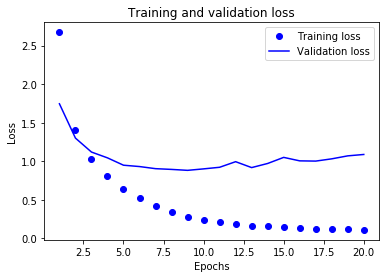

In [42]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(his_dict['loss'])+1)

plt.plot(epochs, his_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, his_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

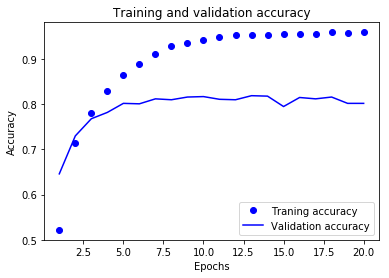

In [50]:
#plotting training and validation accuracy
plt.clf()
his_dict = history.history
acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

plt.plot(epochs, his_dict['accuracy'],'bo',label='Traning accuracy')
plt.plot(epochs, his_dict['val_accuracy'],'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [52]:
#retraining the model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [53]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
model.fit(partial_x_train,
         partial_y_train,
         epochs=15,
          batch_size=512,
          validation_data = (x_val, y_val)
         )
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/15
7982/7982 [==============================] - 1s 65us/step - loss: 0.0646 - accuracy: 0.9600 - val_loss: 1.8945 - val_accuracy: 0.7580
Epoch 2/15
7982/7982 [==============================] - 0s 61us/step - loss: 0.0652 - accuracy: 0.9588 - val_loss: 1.9213 - val_accuracy: 0.7660
Epoch 3/15
7982/7982 [==============================] - 0s 61us/step - loss: 0.0655 - accuracy: 0.9569 - val_loss: 1.9081 - val_accuracy: 0.7640
Epoch 4/15
7982/7982 [==============================] - 0s 56us/step - loss: 0.0636 - accuracy: 0.9595 - val_loss: 2.0019 - val_accuracy: 0.7560
Epoch 5/15
7982/7982 [==============================] - 0s 61us/step - loss: 0.0638 - accuracy: 0.9592 - val_loss: 1.9429 - val_accuracy: 0.7500
Epoch 6/15
7982/7982 [==============================] - 1s 65us/step - loss: 0.0641 - accuracy: 0.9599 - val_loss: 1.9735 - val_accuracy: 0.7510
Epoch 7/15
7982/7982 [==============================] - 0s 59us/step - loss: 0.062

In [65]:
#generating predictions for new data
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [66]:
np.sum(predictions[0])

0.99999994

In [68]:
#largest entry in the predicted class
np.argmax(predictions[0])

3